  # Classification
  ### (a) 1 vs all animal (Caterpillar vs all)

mounting the drive to get access to dataset.

In [162]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


extracting the zip file

In [163]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/animals 1 vs  all.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


In [164]:
from keras.layers import *
from keras.models import *
import keras as tf

Constructing the model architecture and incorporating hidden layers therein.

In [165]:
#Training model
model1 = Sequential()   ## creating a blank model
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))    ### reduce the overfitting

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())    ### input layer
model1.add(Dense(64,activation='relu'))    ## hidden layer of ann
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))   ## output layer

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Moulding train images (increasing data set)(data augmentation)

In [166]:
from tensorflow.keras.preprocessing import image
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

Reshaping test and validation images

In [167]:
train_generator = train_datagen.flow_from_directory(
    '/content/animals 1 vs  all',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/animals 1 vs  all',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 5400 images belonging to 2 classes.
Found 5400 images belonging to 2 classes.


Training the model

In [168]:
history = model1.fit(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=1
)

Epoch 1/10
7/7 [==============================] - 29s 3s/step - loss: 0.2962 - accuracy: 0.9464 - val_loss: 0.1520 - val_accuracy: 0.9688
Epoch 2/10
7/7 [==============================] - 34s 5s/step - loss: 0.0650 - accuracy: 0.9911 - val_loss: 0.0812 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 26s 4s/step - loss: 0.0639 - accuracy: 0.9911 - val_loss: 0.0892 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 0.0345 - accuracy: 0.9955 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 26s 4s/step - loss: 0.0849 - accuracy: 0.9911 - val_loss: 0.0938 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 24s 3s/step - loss: 0.0942 - accuracy: 0.9866 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 26s 4s/step - loss: 0.0345 - accuracy: 0.9955 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==================

Defining Functions to test the data.

In [169]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
import keras.utils as image
import numpy as np
def ImagePrediction1(FilePath):
  img = image.load_img(FilePath, target_size=(224,224))
  print(img)
  plt.imshow(img)
  plt.axis('off')  # Turn off axis
  plt.show()
  img = image.img_to_array(img)
  img = img/255 # normalization
  img = np.expand_dims(img,axis=0)
  ypred= model1.predict(img)
  print(ypred)
  return ypred

In [183]:
def Conclusion1(ypred):
  if ypred[0][0]<0.008:
    print ("Caterpillar")
  else:
    print("Other Animal")

Testing the model with images.

<PIL.Image.Image image mode=RGB size=224x224 at 0x7D29140F82B0>


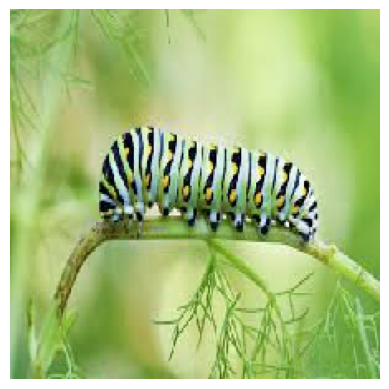

1/1 [==============================] - 0s 52ms/step
[[0.00766781]]
Caterpillar
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D2914118910>


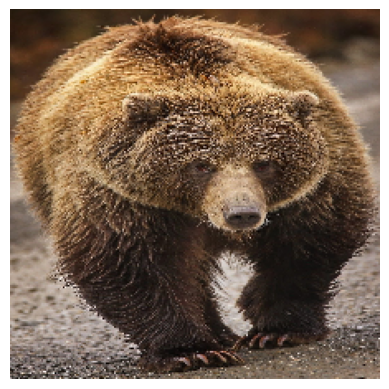

1/1 [==============================] - 0s 39ms/step
[[0.00901231]]
Other Animal


In [184]:
ypred=ImagePrediction1('/content/animals 1 vs  all/caterpillar/2dd74b37fe.jpg')
Conclusion1(ypred)
ypred=ImagePrediction1('/content/animals 1 vs  all/animals/bear/039b2ae790.jpg')
Conclusion1(ypred)

### (b) 5 class classification
* caterpillar
* bat
* jellyffish
* sparrow
* zebra

extracting the other ZIP file.

In [172]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/animals 5 Class.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


Again constructing the model architecture and incorporating hidden layers therein.

In [173]:
#Training model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Moulding train images (increasing data set)(data augmentation)

In [174]:
from tensorflow.keras.preprocessing import image
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

Reshaping test and validation images

In [175]:
train_generator = train_datagen.flow_from_directory(
    '/content/animals 5 Class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_dataset.flow_from_directory(
    '/content/animals 5 Class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 300 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


Train the mode

In [176]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=10,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=1
)

Epoch 1/10
10/10 [==============================] - 34s 3s/step - loss: 1.6723 - accuracy: 0.2067 - val_loss: 1.5798 - val_accuracy: 0.1250
Epoch 2/10
10/10 [==============================] - 33s 3s/step - loss: 1.4696 - accuracy: 0.3067 - val_loss: 1.5037 - val_accuracy: 0.3750
Epoch 3/10
10/10 [==============================] - 32s 3s/step - loss: 1.4540 - accuracy: 0.3433 - val_loss: 1.5611 - val_accuracy: 0.3438
Epoch 4/10
10/10 [==============================] - 32s 3s/step - loss: 1.3967 - accuracy: 0.3667 - val_loss: 1.4581 - val_accuracy: 0.4062
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 1.4016 - accuracy: 0.3333 - val_loss: 1.3287 - val_accuracy: 0.5938
Epoch 6/10
10/10 [==============================] - 42s 4s/step - loss: 1.3348 - accuracy: 0.4033 - val_loss: 1.3897 - val_accuracy: 0.3750
Epoch 7/10
10/10 [==============================] - 32s 3s/step - loss: 1.4085 - accuracy: 0.4100 - val_loss: 1.3021 - val_accuracy: 0.5312
Epoch 8/10
10/10 [==

we can train our model for more epochs and step per epochs to increase the accuracy and decrease the loss. for now I'm leaveing it.

defining the function to test the model

In [177]:
def ImagePrediction2(FilePath):
  img = image.load_img(FilePath, target_size=(224,224))
  print(img)
  plt.imshow(img)
  plt.axis('off')  # Turn off axis
  plt.show()
  img = image.img_to_array(img)
  img = img/255 # normalization
  img = np.expand_dims(img,axis=0)
  ypred = model.predict(img)
  print(ypred)
  class_index = np.mean(ypred)
  print("Prediction:" ,class_index)
  return class_index

In [178]:
def Conclusion2(ypred):
  if ypred<0.01 and ypred>0.009:
    print ("Sparrow")
  elif ypred<0.006 and ypred>=0.005:
    print("Jelly Fish")
  elif ypred<0.02 and ypred>=0.015:
    print("Caterpillar")
  elif ypred<0.05 and ypred>=0.02:
    print("Bat")
  elif ypred<0.004 and ypred>=0.002:
    print("Zebra")
  else:
    print("Other Animal")

Testing the model.

<PIL.Image.Image image mode=RGB size=224x224 at 0x7D2914188B80>


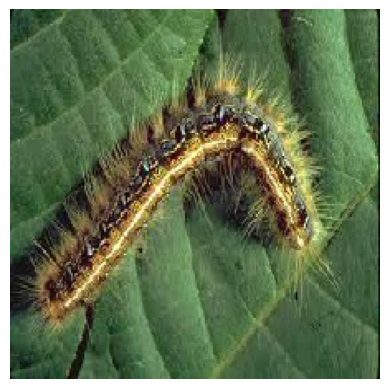

1/1 [==============================] - 0s 40ms/step
[[0.0153736]]
Prediction: 0.015373603
Caterpillar
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D2914390A00>


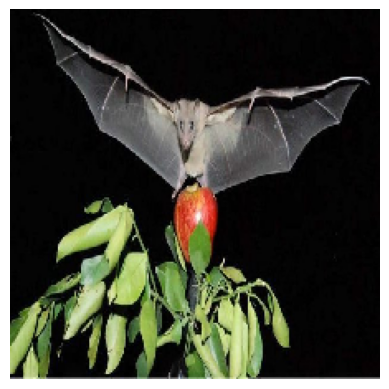

1/1 [==============================] - 0s 40ms/step
[[0.01178463]]
Prediction: 0.011784627
Other Animal
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D29141C9F00>


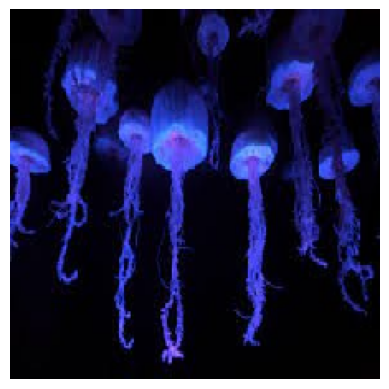

1/1 [==============================] - 0s 40ms/step
[[0.00519926]]
Prediction: 0.005199263
Jelly Fish
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D29141C92D0>


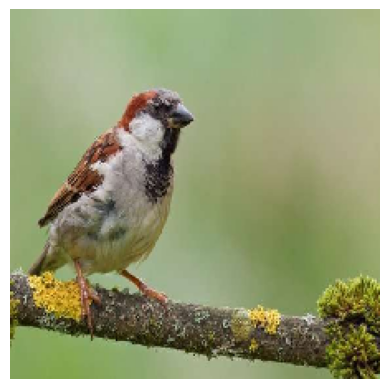

1/1 [==============================] - 0s 40ms/step
[[0.00933347]]
Prediction: 0.009333474
Sparrow
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D29265518A0>


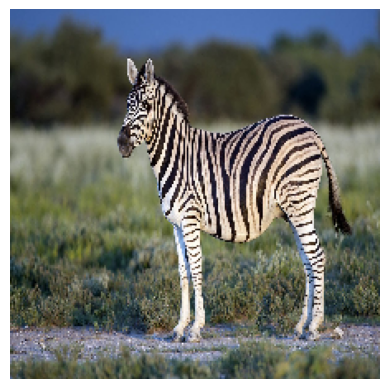

1/1 [==============================] - 0s 40ms/step
[[0.00255889]]
Prediction: 0.0025588947
Zebra


In [179]:
ypred=ImagePrediction2('/content/animals 5 Class/caterpillar/4ccbe38098.jpg')
Conclusion2(ypred)
ypred=ImagePrediction2('/content/animals 5 Class/bat/866a4779a7.jpg')
Conclusion2(ypred)
ypred=ImagePrediction2('/content/animals 5 Class/jellyfish/0dff185710.jpg')
Conclusion2(ypred)
ypred=ImagePrediction2('/content/animals 5 Class/sparrow/17f2f8983d.jpg')
Conclusion2(ypred)
ypred=ImagePrediction2('/content/animals 5 Class/zebra/60af7b19e1.jpg')
Conclusion2(ypred)